In [1]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import community
import argparse
import itertools
import gzip
import sys
import joypy
import pandas as pd
%matplotlib inline

from network_ei import *

In [2]:
print("Copy-Copy Network Approach:")
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,1.0,0,0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (DD): \t", np.round(get_EInet_DD(A), 6))
print("\tEffective Information (CI): \t", np.round(get_EInet_CI(A), 6))
print("\tEffective Information (EI): \t", np.round(get_EInet_EI(A), 6))

Copy-Copy Network Approach:
[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]
 
	Effective Information (DD): 	 2.0
	Effective Information (CI): 	 2.0
	Effective Information (EI): 	 2.0


In [141]:
ps = np.logspace(-4, 0, num=15)
p0 = ps[0]
n_graphs = 10
k = 10
N = 1000

ei_dict = dict(zip(ps, [[]]*len(ps)))
cc_dict = dict(zip(ps, [[]]*len(ps)))
pl_dict = dict(zip(ps, [[]]*len(ps)))

# inits
ei0 = []
cc0 = []
pl0 = []
for i in range(n_graphs):
    G = nx.watts_strogatz_graph(N, k, p0)
    cc0.append(nx.average_clustering(G))
    pl0.append(nx.average_shortest_path_length(G))
    ei0.append(get_EInet_DD(G))

ei0 = np.mean(ei0)
cc0 = np.mean(cc0)
pl0 = np.mean(pl0)

In [142]:
for i, p in enumerate(ps):
    cc_list = []
    pl_list = []
    ei_list = []
    if i%5==0:
        print(i)
    for i in range(n_graphs):
        G = nx.watts_strogatz_graph(N, k, p)
        while not nx.is_connected(G):
            G = nx.watts_strogatz_graph(N, k, p)
        cc_list.append(nx.average_clustering(G))
        pl_list.append(nx.average_shortest_path_length(G))
        ei_list.append(get_EInet_DD(G))
        
    ei_dict[p] = np.mean(ei_list)
    pl_dict[p] = np.mean(pl_list)
    cc_dict[p] = np.mean(cc_list)    

ei = dict(zip(ps, [0]*len(ps)))
cc = dict(zip(ps, [0]*len(ps)))
pl = dict(zip(ps, [0]*len(ps)))

for p in ps:
    ei[p] = np.mean(ei_dict[p]) / ei0
    cc[p] = np.mean(cc_dict[p]) / cc0
    pl[p] = np.mean(pl_dict[p]) / pl0    

0
5
10


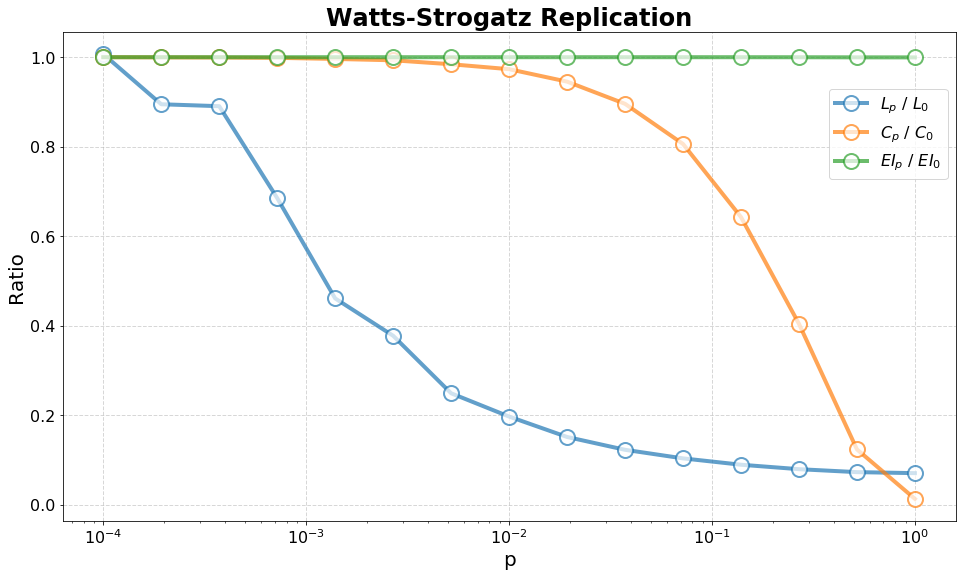

In [153]:
plt.figure(figsize=(16,9))
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

plt.plot(ps, pl.values(), marker='o', markersize=15.0, markerfacecolor='white', 
         markeredgewidth=2, alpha=0.7, label='$L_{p}$ / $L_{0}$', linewidth=4.0)
plt.plot(ps, cc.values(), marker='o', markersize=15.0, markerfacecolor='white', 
         markeredgewidth=2, alpha=0.7, label='$C_{p}$ / $C_{0}$', linewidth=4.0)
plt.plot(ps, ei.values(), marker='o', markersize=15.0, markerfacecolor='white', 
         markeredgewidth=2, alpha=0.7, label='$EI_{p}$ / $EI_{0}$', linewidth=4.0)

plt.xlabel("p", size=20)
plt.ylabel("Ratio", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xscale("log")
# plt.yscale("log")
plt.legend(bbox_to_anchor=[1.0, 0.9], fontsize=16)
plt.title("Watts-Strogatz Replication", size=24, fontweight='bold')
# plt.savefig("WS_figure_ei2.png", dpi=425, bbox_inches='tight')
plt.show()